In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readFile(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

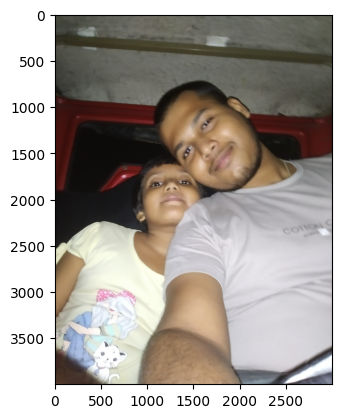

In [3]:
path = "IMG_20230826_192847.jpg"
img = readFile(path)

orgImg = np.copy(img)

In [4]:
#create age mask

def edgeMask(img, lineSize, blurValue):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    grayBlur = cv2.medianBlur(gray, blurValue)

    edges = cv2.adaptiveThreshold(grayBlur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, lineSize, blurValue)
    
    return edges 


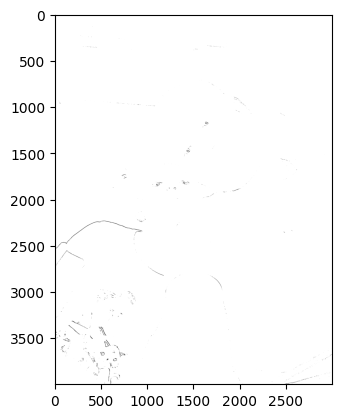

In [5]:
lineSize , blurVlaue = 7,7
edges = edgeMask(img, lineSize, blurVlaue)

plt.imshow(edges, cmap="gray")
plt.show()

In [6]:
def colorQuant(img, k):
    data = np.float32(img).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TermCriteria_MAX_ITER, 20, 0.001)

    lable, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[lable.flatten()]
    result = result.reshape(img.shape)

    return result

In [7]:
img = colorQuant(img, k=9)

plt.imshow(img)
plt.show

ValueError: too many values to unpack (expected 2)

<function matplotlib.pyplot.show(close=None, block=None)>

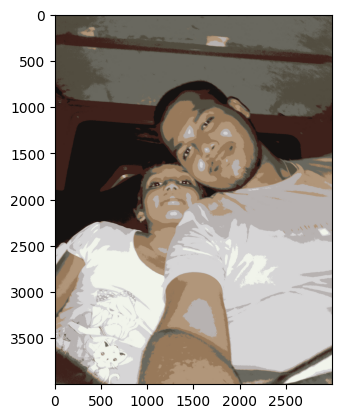

In [ ]:
blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)
plt.imshow(img)
plt.show

In [ ]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)

    plt.imshow(c)
    plt.title("cartoonified image")
    plt.show()


    plt.imshow(orgImg)
    plt.title("original image")
    plt.show()



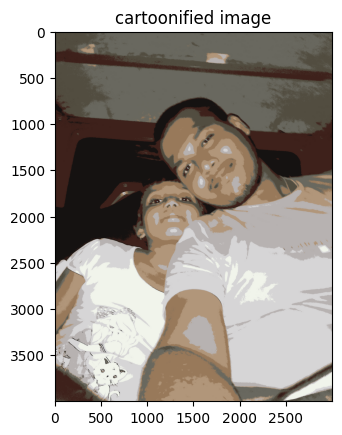

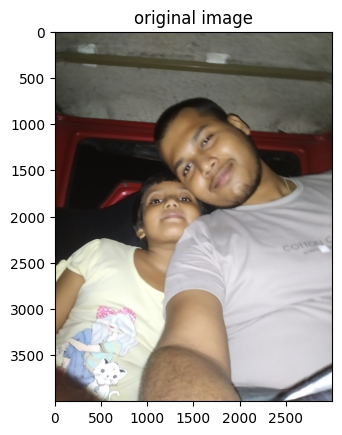

In [ ]:
cartoon()